##Assignment 1: Data Science

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas dataframe
titanic_df = pd.read_csv('Titanic.csv')

In [10]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [3]:
# Print the first 5 rows using the head() method

titanic_df.head()

# Get information about the dataset using the info() method

titanic_df.info()

# Describe the dataset using the describe() method

titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeRange     714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Group the data based on the Pclass column and calculate the mean fare for each class
class_fare_mean = titanic_df.groupby('Pclass')['Fare'].mean()
class_fare_mean

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [5]:
# Get the frequency count of the Embarked column using value_counts() method
embarked_counts = titanic_df['Embarked'].value_counts()
embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
# Create a new column called AgeRange categorizing passengers into age ranges
bins = [0, 12, 19, 59, 120]  # Age ranges: Child, Teen, Adult, Senior
labels = ['Child', 'Teen', 'Adult', 'Senior']
titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)

In [7]:
# Create a pivot table showing the survival rate based on sex, class, and age range
pivot_table_survival = pd.pivot_table(titanic_df, values='Survived', index=['Sex', 'Pclass', 'AgeRange'], aggfunc='mean')
pivot_table_survival

Survived
Sex    Pclass AgeRange          
female 1      Child     0.000000
              Teen      1.000000
              Adult     0.971831
              Senior    1.000000
       2      Child     1.000000
              Teen      1.000000
              Adult     0.900000
       3      Child     0.478261
              Teen      0.550000
              Adult     0.413793
              Senior    1.000000
male   1      Child     1.000000
              Teen      0.500000
              Adult     0.414634
              Senior    0.142857
       2      Child     1.000000
              Teen      0.000000
              Adult     0.063291
              Senior    0.200000
       3      Child     0.333333
              Teen      0.111111
              Adult     0.137056
              Senior    0.000000

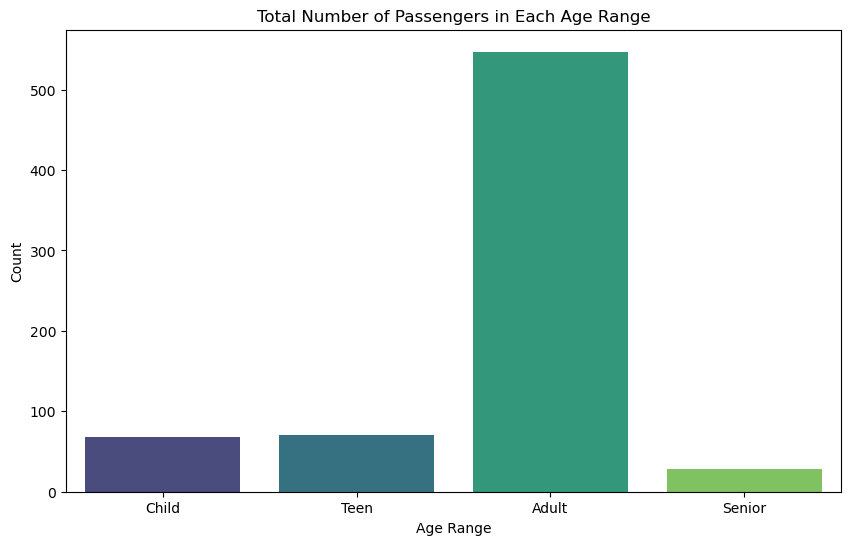

In [8]:
# Create a bar chart showing the total number of passengers in each age range
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeRange', data=titanic_df, palette='viridis')
plt.title('Total Number of Passengers in Each Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

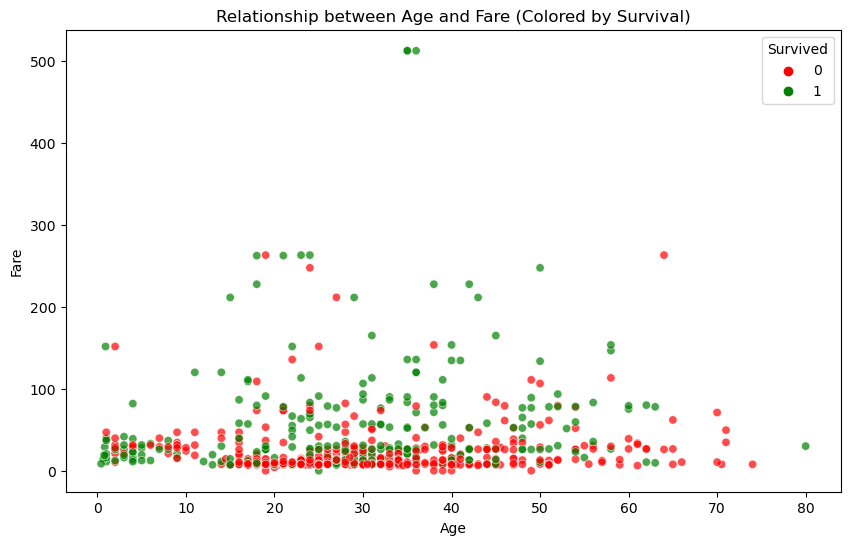

In [9]:
# Create a scatter plot showing the relationship between age and fare, color points based on survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'}, alpha=0.7)
plt.title('Relationship between Age and Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()